In [34]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [35]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [36]:
#загрузим датасет по средним ценам на авокадо
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [37]:
avocado_mean = avocado_mean.to_frame()

In [38]:
avocado_mean

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [41]:
#построим скользящее среднее с окном 2
avocado_mean2 = avocado_mean.AveragePrice.rolling(2).mean().to_frame().reset_index()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


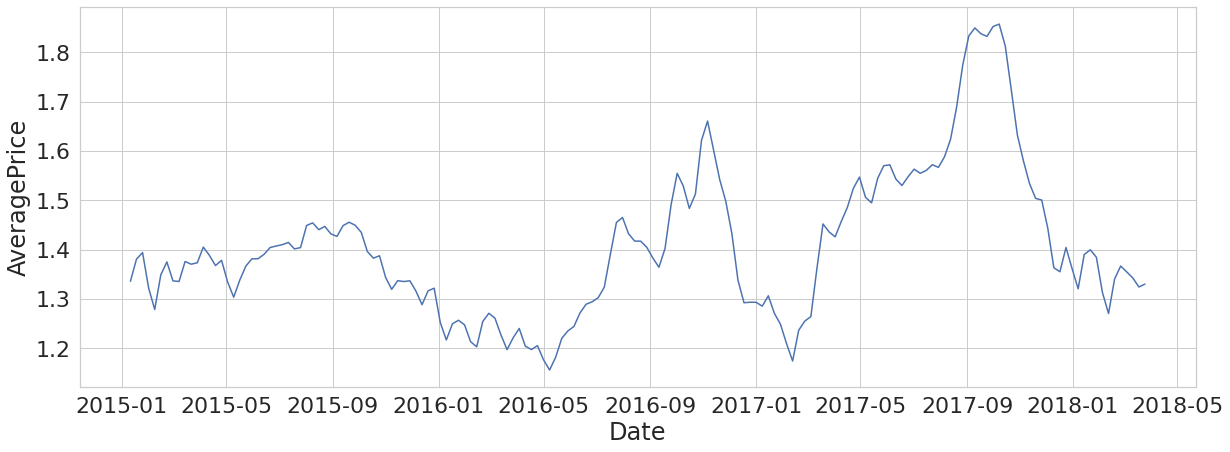

In [42]:
#и картинку
sns.lineplot(avocado_mean2.Date, avocado_mean2.AveragePrice)

In [43]:
#а теперь с окном 4
avocado_mean4 = avocado_mean.AveragePrice.rolling(4).mean().to_frame().reset_index()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


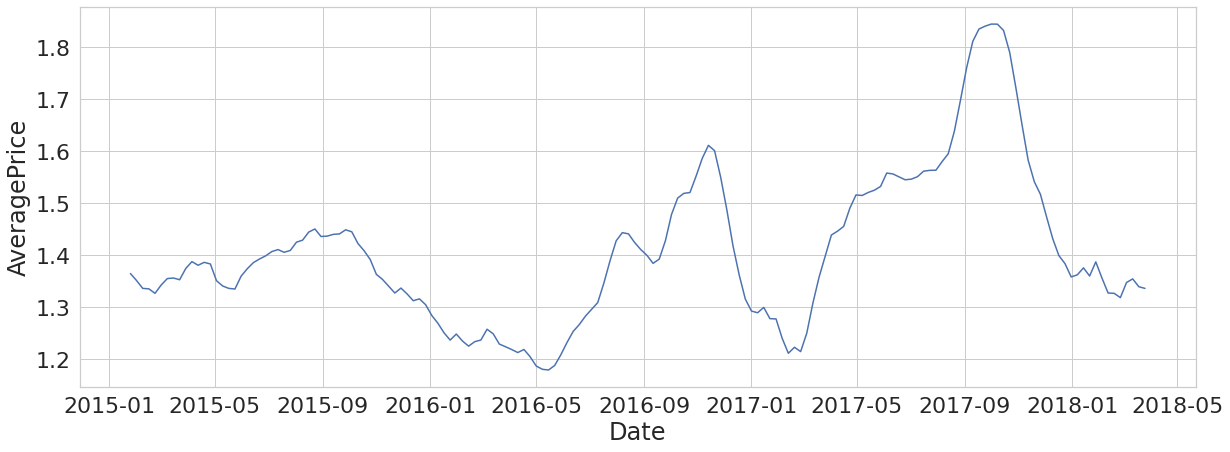

In [44]:
sns.lineplot(avocado_mean4.Date, avocado_mean4.AveragePrice)

In [48]:
#а теперь экспоненциальное сглаживание с окном 2
avocado_ewm = avocado_mean.AveragePrice.ewm(span=2).mean()

In [51]:
#теперь загрузим полный датасет по авокадо
avocado_full = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_full.csv",
                           index_col=0, parse_dates=['Date'])

In [52]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [56]:
#отберем органические авокадо из Чикаго
org_chicago = avocado_full.query('type == "organic" & region == "Chicago"') \
    .sort_values('Date') 

In [57]:
org_chicago

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


In [65]:
#построим скользящее среднее с окном 3 для цены 
org_chicago_mean = org_chicago.AveragePrice.rolling(4).mean().round(3).to_frame().reset_index()

In [66]:
org_chicago_mean

,Date,AveragePrice
0,2015-01-04,NaN
1,2015-01-11,NaN
2,2015-01-18,NaN
3,2015-01-25,1.730
4,2015-02-01,1.737
...,...,...
164,2018-02-25,1.652
165,2018-03-04,1.652
166,2018-03-11,1.655
167,2018-03-18,1.655


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


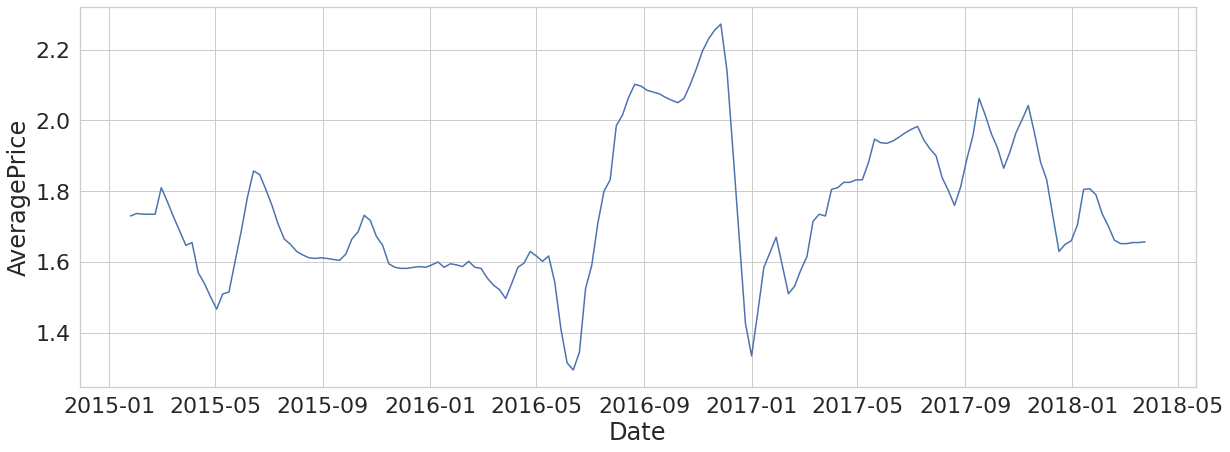

In [67]:
sns.lineplot(org_chicago_mean.Date, org_chicago_mean.AveragePrice)

In [68]:
#а теперь экспоненциальное сглаживание
org_chicago_rollmean = org_chicago.AveragePrice.ewm(span=4).mean().round(3).to_frame().reset_index()

In [69]:
org_chicago_rollmean

,Date,AveragePrice
0,2015-01-04,1.490
1,2015-01-11,1.678
2,2015-01-18,1.745
3,2015-01-25,1.784
4,2015-02-01,1.670
...,...,...
164,2018-02-25,1.677
165,2018-03-04,1.654
166,2018-03-11,1.656
167,2018-03-18,1.658


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


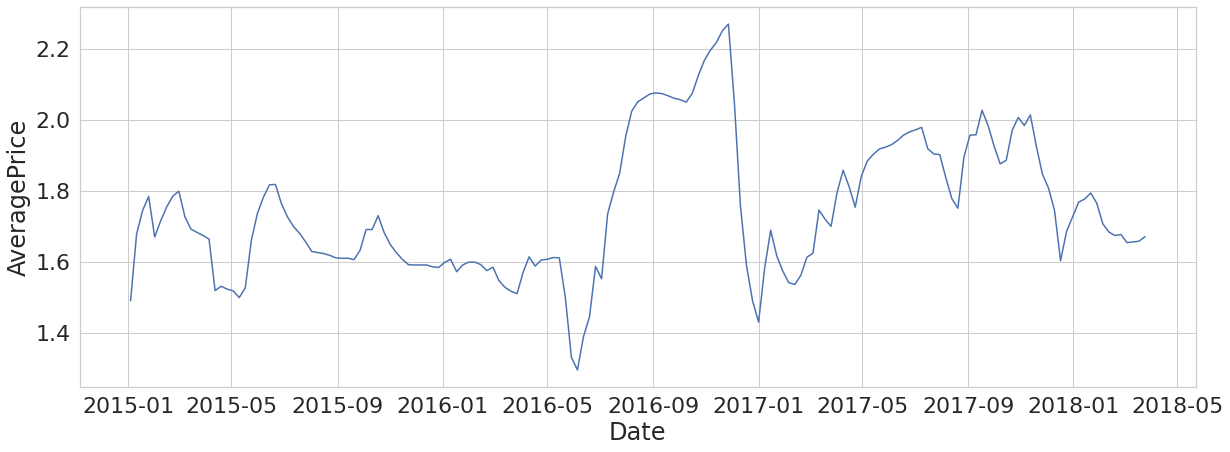

In [71]:
sns.lineplot(org_chicago_rollmean.Date, org_chicago_rollmean.AveragePrice)